## VERİLERİN OKUNMASI VE KEŞİFSEL ANALİZ & Ve MANİPÜLASYONLARI

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = "../dataset/proje_verileri.xlsx"
data = pd.read_excel(data_path)

In [3]:
data.head()

,CenterID,Year,Month,Type,NumbUsed
0,241,2013,2,A,3
1,241,2013,2,A,1
2,241,2013,3,A,1
3,241,2013,3,A,6
4,241,2013,3,A,1


In [4]:
data.tail()

,CenterID,Year,Month,Type,NumbUsed
112651,6128,2023,12,A,2
112652,6128,2023,12,A,2
112653,6128,2023,12,A,1
112654,6128,2023,12,A,2
112655,6128,2023,12,A,2


In [5]:
# betimleyici istatistikleri
data.describe()

,CenterID,Year,Month,NumbUsed
count,112656.000000,112656.000000,112656.000000,112656.000000
mean,2906.946314,2016.686799,6.648150,4.346293
std,2902.097044,4.633089,3.474614,8.232428
min,197.000000,2003.000000,1.000000,1.000000
25%,241.000000,2014.000000,4.000000,1.000000
50%,298.000000,2017.000000,7.000000,2.000000
75%,6124.000000,2021.000000,10.000000,4.000000
max,6312.000000,2023.000000,12.000000,869.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112656 entries, 0 to 112655
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   CenterID  112656 non-null  int64 
 1   Year      112656 non-null  int64 
 2   Month     112656 non-null  int64 
 3   Type      112656 non-null  object
 4   NumbUsed  112656 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 4.3+ MB


In [7]:
# datanın bpş veri kontrolü
data.isna().sum()

CenterID    0
Year        0
Month       0
Type        0
NumbUsed    0
dtype: int64

In [8]:
# datanın son hali
data.head()

,CenterID,Year,Month,Type,NumbUsed
0,241,2013,2,A,3
1,241,2013,2,A,1
2,241,2013,3,A,1
3,241,2013,3,A,6
4,241,2013,3,A,1


In [9]:
# datanın sıralanması
data = data.sort_values(by=["Year", "Month"])

In [10]:
# year ve month sütunularının birleştirilmesi
data["Date"] = data["Year"].astype(str) + "-" +data["Month"].astype(str)

In [11]:
# year ve month'un düşürülmesi
data.drop(["Year", "Month"], axis=1, inplace=True)

In [12]:
data.head()

,CenterID,Type,NumbUsed,Date
53535,6113,A,1,2003-1
97111,6129,A,1,2003-1
103377,258,A,1,2003-1
53536,6113,A,1,2003-2
53537,6113,A,1,2003-2


In [13]:
data.drop("CenterID", axis=1, inplace=True)

In [14]:
data["Date"] = pd.to_datetime(data["Date"])

In [15]:
data['Date'] = data['Date'].apply(lambda x: x.strftime('%Y-%m'))

In [16]:
# Date sütununun datetime veritipine çevirilip index haline getirlimesi
data.set_index("Date", inplace=True)

In [18]:
data.head()

,Type,NumbUsed
Date,,
2003-01,A,1
2003-01,A,1
2003-01,A,1
2003-02,A,1
2003-02,A,1


## DATA VISUALIZATION

In [17]:
A = data.Type.value_counts().iloc[0]
B = data.Type.value_counts().iloc[1]

Text(0.5, 1.0, 'COUNT PLOT')

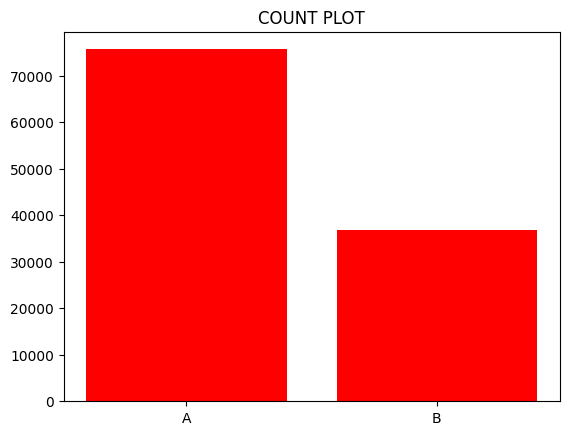

In [19]:
plt.bar(["A", "B"],[A, B], color="red")
plt.title("COUNT PLOT")

In [20]:
# ortalama A ve B kullanımım
mean_A = data.groupby("Type").mean().iloc[0].values[0]
mean_B = data.groupby("Type").mean().iloc[1].values[0]

In [21]:
mean_A

4.819721062919331

Text(0.5, 1.0, 'A&B Mean')

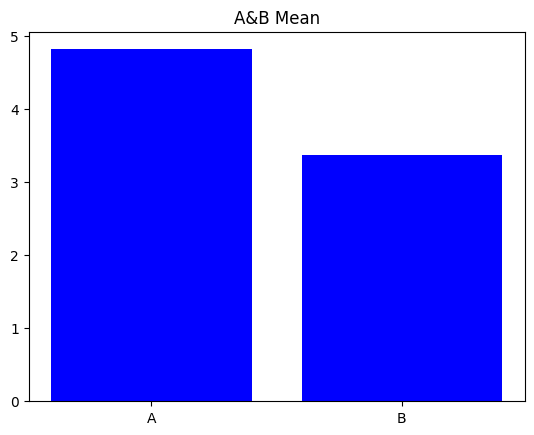

In [22]:
plt.bar(["A", "B"],[mean_A, mean_B], color="blue")
plt.title("A&B Mean")

In [23]:
dummy = pd.get_dummies(data=data,columns=["Type"], drop_first=True, dtype=int)

In [24]:
dummy

,NumbUsed,Type_B
Date,,
2003-01,1,0
2003-01,1,0
2003-01,1,0
2003-02,1,0
2003-02,1,0
...,...,...
2023-12,2,0
2023-12,2,0
2023-12,1,0


<Axes: >

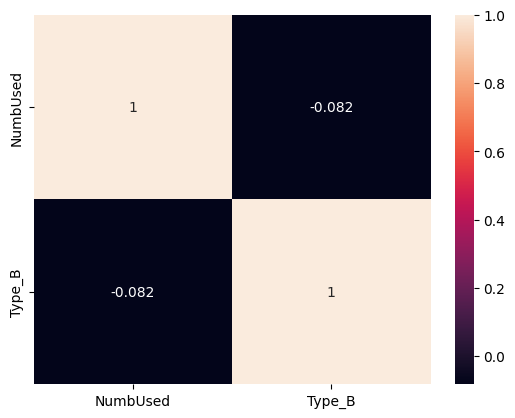

In [25]:
sns.heatmap(dummy.corr(), annot=True)

In [26]:
from statsmodels.tsa.arima.model import ARIMA

In [27]:
dummy["NumbUsed"]

Date
2003-01    1
2003-01    1
2003-01    1
2003-02    1
2003-02    1
          ..
2023-12    2
2023-12    2
2023-12    1
2023-12    2
2023-12    2
Name: NumbUsed, Length: 112656, dtype: int64

## ARIMA MODEL

In [28]:
model = ARIMA(dummy.NumbUsed, order=(5, 1, 0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())


/home/charon5/ML_AI/machine_learning_ai/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/charon5/ML_AI/machine_learning_ai/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/charon5/ML_AI/machine_learning_ai/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               NumbUsed   No. Observations:               112656
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -388455.596
Date:                Mon, 08 Apr 2024   AIC                         776923.192
Time:                        22:00:50   BIC                         776980.985
Sample:                             0   HQIC                        776940.637
                             - 112656                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7017      0.000  -3540.234      0.000      -0.702      -0.701
ar.L2         -0.4915      0.000  -1515.420      0.000      -0.492      -0.491
ar.L3         -0.3420      0.000   -916.804      0.0

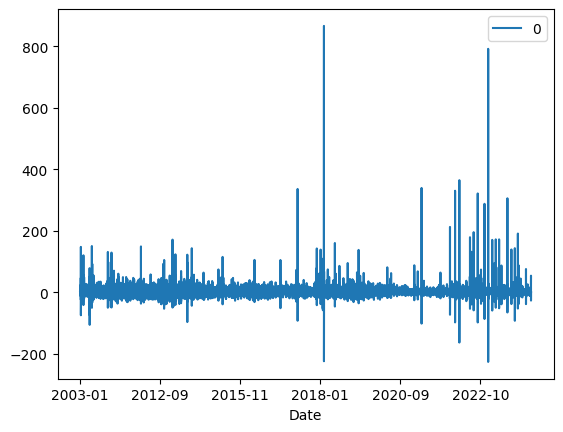

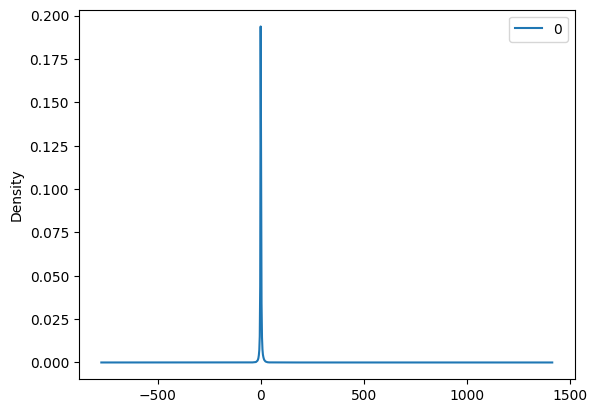

                   0
count  112656.000000
mean        0.000029
std         7.608350
min      -226.905191
25%        -1.409671
50%        -0.351568
75%         0.939589
max       865.692754


In [29]:
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [40]:
from sklearn.metrics import mean_squared_error
# split into train and test sets
# split into train and test sets
X = dummy["NumbUsed"].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(5,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))



predicted=4.497616, expected=3.000000
predicted=3.896610, expected=2.000000
predicted=3.092685, expected=5.000000
predicted=4.040013, expected=7.000000
predicted=4.848226, expected=7.000000
predicted=5.441074, expected=7.000000
predicted=5.804764, expected=8.000000
predicted=6.549867, expected=3.000000
predicted=5.604606, expected=5.000000
predicted=5.653014, expected=8.000000
predicted=6.510185, expected=6.000000
predicted=6.273739, expected=17.000000
predicted=9.830653, expected=3.000000
predicted=6.935562, expected=9.000000
predicted=7.984873, expected=7.000000
predicted=7.931057, expected=2.000000
predicted=6.062997, expected=5.000000
predicted=6.282703, expected=8.000000
predicted=6.011034, expected=30.000000
predicted=14.469986, expected=19.000000
predicted=15.091206, expected=31.000000
predicted=19.967246, expected=27.000000
predicted=22.511579, expected=35.000000
predicted=27.512048, expected=28.000000
predicted=28.884850, expected=38.000000
predicted=31.498211, expected=26.000

KeyboardInterrupt: 

Test RMSE: 5.223


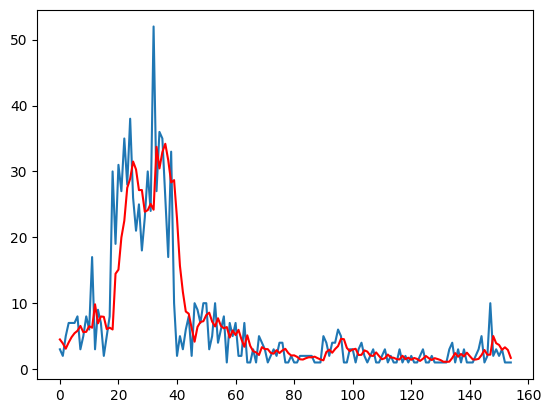

In [41]:
# evaluate forecasts
rmse = (mean_squared_error(test[:len(predictions)], predictions[:len(predictions)]))**0.5
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test[:len(predictions)])
plt.plot(predictions[:len(predictions)], color='red')
plt.show()

In [42]:
scores = pd.DataFrame({"ARIMA-RMSE": rmse, "Linear Model-rmse": None}, index=[0])

In [43]:
scores

,ARIMA-RMSE,Linear Model-rmse
0,5.222659,None


## LINEAR REGRESSION MODEL

In [44]:
dummy["Target"] = dummy["NumbUsed"].shift(1)

In [45]:
dummy.dropna(inplace=True)

In [46]:
# Split the data into featuer and target
target = "NumbUsed"
y = dummy[target]
X = dummy.drop(columns= ["NumbUsed", "Type_B"])                                             
#Split the data into train and test sets
cutoff = int(len(X) * 0.8)
X_train, y_train = X.iloc[:cutoff], y.iloc[:cutoff]
X_test, y_test = X.iloc[cutoff:], y.iloc[cutoff:]

In [47]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:

training_mae = mean_squared_error(y_train, model.predict(X_train))**0.5
test_mae = mean_squared_error(y_test, model.predict(X_test))**0.5
print("Training rmse:", round(training_mae, 2))
print("Test rmse:", round(test_mae, 2))

Training rmse: 6.99
Test rmse: 10.06


In [49]:
scores["Linear Model-rmse"] = test_mae

## XGBOOST

In [50]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [51]:
training_mae = mean_squared_error(y_train, xgb_model.predict(X_train))**0.5
test_mae = mean_squared_error(y_test, xgb_model.predict(X_test))**0.5
print("Training rmse:", round(training_mae, 2))
print("Test rmse:", round(test_mae, 2))

Training rmse: 6.63
Test rmse: 9.52


In [52]:
scores["XGBOOST-rmse"] = test_mae

<Axes: >

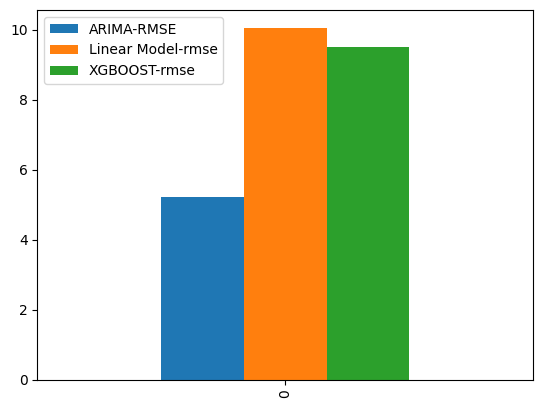

In [53]:
scores.plot(kind="bar")

In [54]:
scores

,ARIMA-RMSE,Linear Model-rmse,XGBOOST-rmse
0,5.222659,10.061823,9.516579
